In [11]:
import functools
import os

!pip install tensorflow_hub


from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from keras.preprocessing.image import load_img


print("TF Version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.config.list_physical_devices('GPU'))

TF Version:  2.8.0
TF Hub version:  0.12.0
Eager mode enabled:  True
GPU available:  []


In [17]:
# Load content and style images (see example in the attached colab).
content_image = plt.imread("/Users/zwt2000/Desktop/cute/timg.jpg")
style_image = plt.imread("/Users/zwt2000/Desktop/cute/c8a5033872ff22fc9d11637fb174ed78d9d332bb.jpg@1320w_1920h.jpg")
# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1]. Example using numpy:
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
# Optionally resize the images. It is recommended that the style image is about
# 256 pixels (this size was used when training the style transfer network).
# The content image can be any size.
style_image = tf.image.resize(style_image, (256, 256))

# Load image stylization module.
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

In [38]:
stylized_image

<tf.Tensor: shape=(1, 472, 692, 3), dtype=float32, numpy=
array([[[[0.8157425 , 0.91686946, 0.8226937 ],
         [0.8400426 , 0.9269111 , 0.8415966 ],
         [0.8140791 , 0.91797984, 0.8265002 ],
         ...,
         [0.45687604, 0.57435095, 0.40515628],
         [0.55103254, 0.6609234 , 0.49497917],
         [0.5766432 , 0.66551703, 0.51789916]],

        [[0.9012196 , 0.9490267 , 0.8985187 ],
         [0.9134033 , 0.955455  , 0.9097019 ],
         [0.9028746 , 0.9523058 , 0.9015881 ],
         ...,
         [0.52138376, 0.62052345, 0.46347857],
         [0.6017884 , 0.6924727 , 0.5401591 ],
         [0.6262341 , 0.6969057 , 0.55636036]],

        [[0.8023958 , 0.9018837 , 0.78842807],
         [0.82752633, 0.9168171 , 0.8141264 ],
         [0.81622887, 0.9144418 , 0.81096876],
         ...,
         [0.346338  , 0.45700082, 0.31249672],
         [0.4123236 , 0.51973206, 0.3712871 ],
         [0.43631464, 0.5241082 , 0.38743076]],

        ...,

        [[0.79138124, 0.8737128 , 

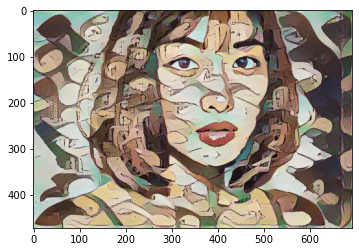

In [27]:
stylized_image_ = np.squeeze(stylized_image) # you can give axis attribute if you wanna squeeze in specific dimension
plt.imshow(stylized_image_)
plt.show()